In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

np.random.seed(42)

%config InlineBackend.figure_format = 'retina'

In [7]:
df = pd.read_csv('NYPD_Historic.csv')

/Users/jennycho/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,590402415,08/22/2007,16:00:00,08/22/2007,21:45:00,62.0,08/22/2007,578,HARRASSMENT 2,638.0,...,F,NaN,40.610586,-73.980682,"(40.610586209, -73.980682338)",PATROL BORO BKLYN SOUTH,NaN,45-64,WHITE,F
1,916707771,08/22/2007,16:00:00,08/22/2007,16:10:00,71.0,08/22/2007,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,NaN,NaN,40.662229,-73.934430,"(40.66222879, -73.934429999)",PATROL BORO BKLYN SOUTH,NaN,18-24,BLACK,F
2,724044564,08/22/2007,16:00:00,NaN,NaN,72.0,08/22/2007,235,DANGEROUS DRUGS,511.0,...,NaN,NaN,40.644697,-74.003583,"(40.644697283, -74.003583285)",PATROL BORO BKLYN SOUTH,NaN,NaN,UNKNOWN,E
3,410394691,08/22/2007,16:00:00,08/22/2007,16:05:00,75.0,08/22/2007,109,GRAND LARCENY,419.0,...,M,NaN,40.664294,-73.886264,"(40.664293755, -73.886264319)",PATROL BORO BKLYN NORTH,NaN,<18,UNKNOWN,F
4,365718279,08/22/2007,16:00:00,NaN,NaN,107.0,08/22/2007,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,NaN,40.715144,-73.806594,"(40.715144183, -73.806593786)",PATROL BORO QUEENS SOUTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,M
5,853256220,08/22/2007,16:00:00,08/22/2007,17:00:00,40.0,08/22/2007,341,PETIT LARCENY,338.0,...,NaN,NaN,40.807779,-73.912262,"(40.807779339, -73.912262462)",PATROL BORO BRONX,NaN,18-24,BLACK,F
6,872541237,08/22/2007,16:00:00,08/22/2007,16:10:00,41.0,08/22/2007,578,HARRASSMENT 2,638.0,...,M,NaN,40.815636,-73.896931,"(40.815635776, -73.896930554)",PATROL BORO BRONX,NaN,NaN,WHITE HISPANIC,F
7,659715454,08/22/2007,16:00:00,08/22/2007,20:00:00,42.0,08/22/2007,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,M,NaN,40.834280,-73.887455,"(40.834280024, -73.88745537)",PATROL BORO BRONX,NaN,<18,WHITE HISPANIC,F
8,214131394,08/22/2007,16:00:00,08/22/2007,17:35:00,122.0,08/22/2007,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,NaN,40.593858,-74.163136,"(40.593857773, -74.163135755)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,M
9,449380913,08/22/2007,15:55:00,08/22/2007,15:56:00,111.0,08/22/2007,235,DANGEROUS DRUGS,567.0,...,NaN,NaN,40.739755,-73.749968,"(40.739754509, -73.749968116)",PATROL BORO QUEENS NORTH,NaN,NaN,UNKNOWN,E


In [13]:
df['year']=(df['RPT_DT'].str[-4:])

In [5]:
# df['year']=df['year'].replace('1015','2015')
# df['year']=df['year'].replace('1026','1926')
# df['year']=df['year'].replace('1027','1927')
#df['int_year'] = pd.to_numeric(df['year'])
df.groupby('year').count().iloc[:,0]

year
2006    529789
2007    536328
2008    529968
2009    512981
2010    509731
2011    498580
2012    504352
2013    497256
2014    491334
2015    478590
2016    478908
2017    468988
Name: CMPLNT_NUM, dtype: int64

In [ ]:
df_2018 = pd.read_csv('NYC_crime.csv')
df_2018['year']='2018'

In [22]:
df_tot = df.append(df_2018, sort=False)

In [ ]:
df_tot

In [16]:
df_tot.groupby('year').count().iloc[:,0]

year
2006    529789
2007    536328
2008    529968
2009    512981
2010    509731
2011    498580
2012    504352
2013    497256
2014    491334
2015    478590
2016    478908
2017    468988
2018       227
Name: CMPLNT_NUM, dtype: int64

In [10]:
df_tot.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'year'],
      dtype='object')

In [ ]:
plt.plot(df_tot.groupby('month').count().iloc[:,0])

In [ ]:
plt.plot(df_tot.groupby('year').count().iloc[:,0])

In [ ]:
plt.plot(df_tot.groupby(['year','month']).size().values)

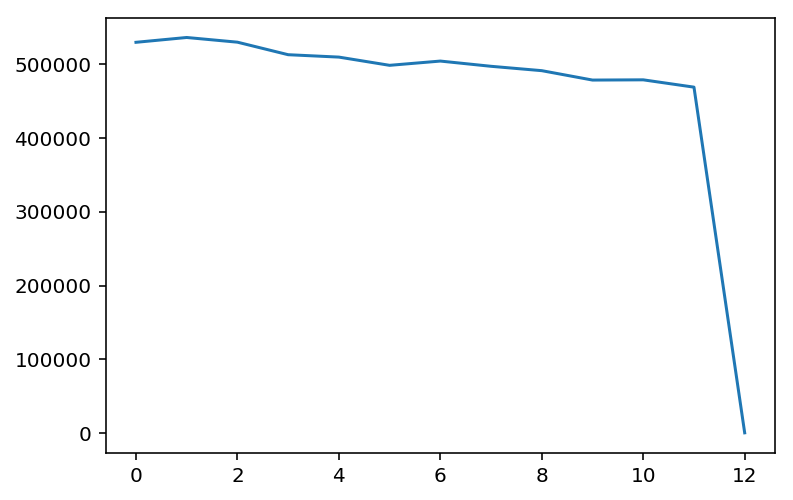

In [17]:
plt.plot(df_tot.groupby(['year']).size().values)

In [2]:
len(df)

NameError: name 'df' is not defined

In [3]:
plt.plot(df_tot,index.df_tot)

NameError: name 'plt' is not defined

In [20]:
index.df_tot['year']

NameError: name 'index' is not defined

In [21]:
dt_tot['year'].index

NameError: name 'dt_tot' is not defined